# Seperate bit planes from 8 bit image

### Algorithm
    1. Create a mask of binary bits - length depends on the number of bit planes
    2. Do a bitwise AND operation of each pixel value with the mask to expose the specific bit plane
    3. Save the newly created pixel value into another temporary image
    4. Display new image
    5. Right shift the mask bit-wise by 1 bit in order to extract the next bit plane
    6. Repeat the step 1 until all the bit planes have been successfully plotted
    

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.gridspec as gridspec

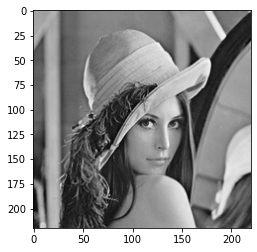

In [3]:
image = cv2.imread('lena.jpg',0)
plt.imshow(image, cmap='gray')

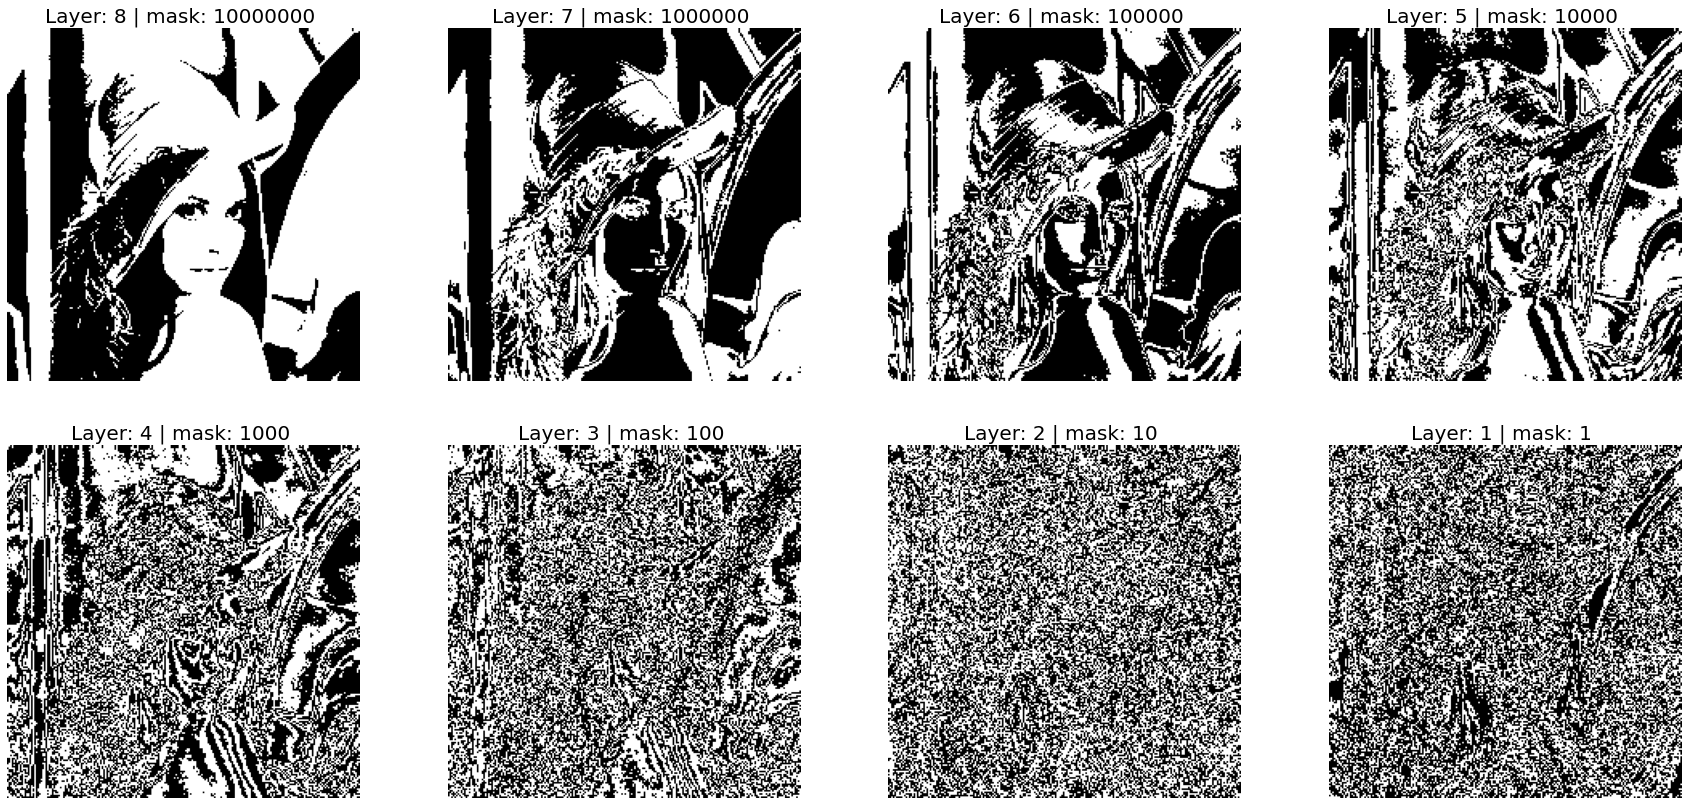

In [5]:
# create the mask, declare teh plotting paramaeters and extract the but planes as per the proposed length of algorithm.
mask = 0b10000000
plt.figure(figsize=(30,30))
gs= gridspec.GridSpec(4,4)
gs.update(wspace=0.25, hspace=0.1)

# for 8 bit plane the mask is shifted 8 times and bit wise AND operation is performed on each pixel with the mask 
for x in range(8):
    temp = np.zeros(image.shape, dtype=np.uint64)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            temp[i][j] = image[i][j] & mask
            
    fig = plt.subplot(gs[x])
    plt.imshow(temp, cmap='gray')
    plt.title("Layer: {0} | mask: {1:b} ".format(8-x, mask), fontsize=20)
    plt.axis('off')
    
    # The mask is shifted by 1 bit after every iteration to select the next bit-plane
    mask >>= 1